In [1]:
# Importing important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import Dataset 
df_train = pd.read_csv('loan-train.csv')
df_test = pd.read_csv('loan-test.csv')

In [3]:
# number of rows and columns
print("Train size",df_train.shape)
print("Test size :",df_test.shape)

Train size (614, 13)
Test size : (367, 12)


In [4]:
# Printing the first 10 rows
df_train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
# Let's check for Null values present in Dataset.
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


Credit_History,Self_Employed,LoanAmount,Dependents,Loan_Amount_Term,Gender,Married have missing values.

In [6]:
# We will fill the missing values
df_train['Gender'] = df_train['Gender'].fillna(
df_train['Gender'].dropna().mode().values[0])
df_train['Married'] = df_train['Married'].fillna(
df_train['Married'].dropna().mode().values[0])
df_train['Dependents'] = df_train['Dependents'].fillna(
df_train['Dependents'].dropna().mode().values[0])
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(
df_train['Self_Employed'].dropna().mode().values[0])
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(
df_train['LoanAmount'].dropna().mode().values[0])
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(
df_train['Loan_Amount_Term'].dropna().mode().values[0])
df_train['Credit_History'] = df_train['Credit_History'].fillna(
df_train['Credit_History'].dropna().mode().values[0])

In [7]:
# again we will check if there is null value remaining.
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## We will do some Visualization.

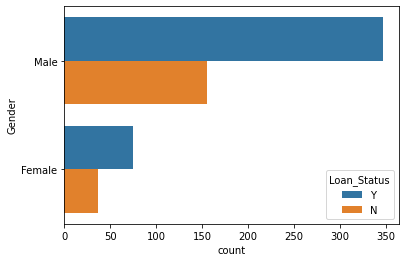

In [8]:
sns.countplot(y = 'Gender', hue = 'Loan_Status', data = df_train)
plt.show()

Male quantity is more than Females for Loan application.
and also male gets more number of Loan approval.

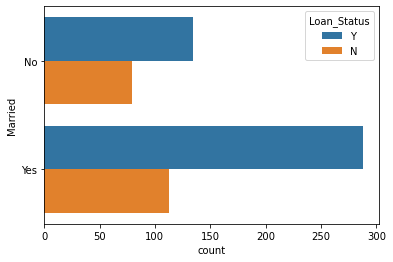

In [9]:
sns.countplot(y = 'Married', hue = 'Loan_Status', data = df_train)
plt.show()

Married People has more chance to get the Loan approval than unmarried.

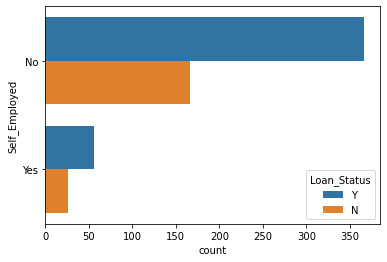

In [10]:
sns.countplot(y = 'Self_Employed', hue = 'Loan_Status', data = df_train)
plt.show()

Non Self-Employed peoples probably salary earners obtain more loan.

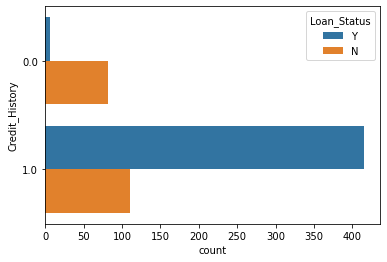

In [11]:
sns.countplot(y = 'Credit_History', hue = 'Loan_Status', data = df_train)
plt.show()

We can see, Greater number of people pay back their loans.

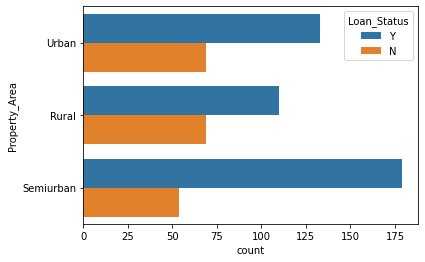

In [12]:
sns.countplot(y = 'Property_Area', hue = 'Loan_Status', data = df_train)
plt.show()

Semi-urban peoples obtained more loan, followed by Urban and then Rural

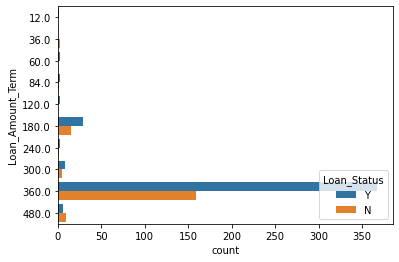

In [13]:
sns.countplot(y = 'Loan_Amount_Term', hue = 'Loan_Status', data = df_train)
plt.show()

High number of people go for 360 loan term.

## We have to do Encoding to numeric data

In [14]:
encode_num = {'Male': 1, 'Female': 2, 'Yes':1, 'No':2,
             'Graduate': 1, 'Not Graduate':2, 'Rural':1, 
              'Semiurban':2, 'Urban':3, 'Y':1, 'N':0, '3+':3}

In [15]:
df_train = df_train.applymap(lambda s: encode_num.get(s) if s in encode_num else s)
df_test = df_test.applymap(lambda s: encode_num.get(s) if s in encode_num else s)

In [16]:
df_train['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [17]:
# Loan_ID can be drop.
df_train.drop('Loan_ID', axis=1, inplace = True)

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 57.7+ KB


Dependents column is not converted to numeric.

In [19]:
# Convert Dependents to numeric
Dependents_train = pd.to_numeric(df_train.Dependents)
Dependents_test = pd.to_numeric(df_test.Dependents)

df_train.drop(['Dependents'], axis = 1, inplace = True)
df_test.drop(['Dependents'], axis = 1, inplace = True)

df_train = pd.concat([df_train, Dependents_train], axis = 1)
df_test = pd.concat([df_test, Dependents_test], axis = 1)

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [ ]:
corr_df = od.DataFrame(columns=['r'])

 Dependents column converted to numerical successfully.

<AxesSubplot:>

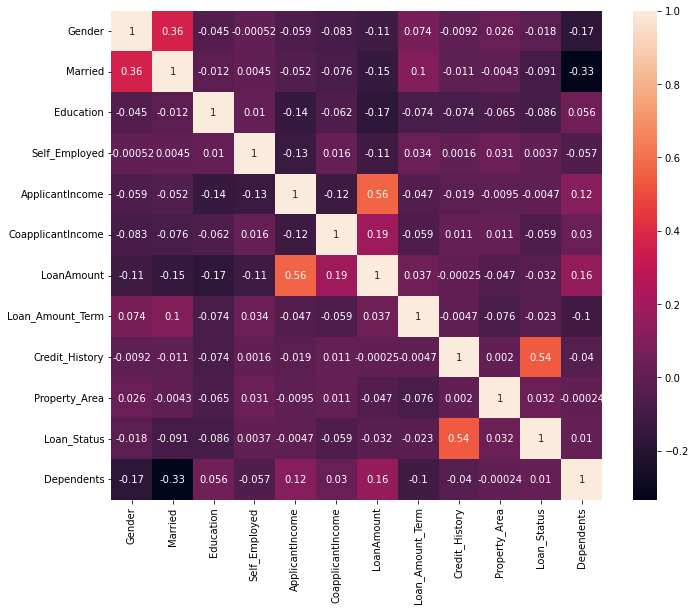

In [21]:
plt.figure(figsize = (11,9))
sns.heatmap(df_train.corr(),annot = True)

From Heatmap, No correlation are extreamly high...
Correlation betweeen LoanAmount and ApplicatIncome;
Loan_Status and Credit_History have some co-relation.

## We will use here Logistic Regression , SVC & Decision Tree Model

## Seperating Feature and Target for Training.

In [22]:
x = df_train.drop('Loan_Status', axis = 1)
y = df_train['Loan_Status']

In [23]:
# import the Classification models
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,stratify=y,random_state=0)

## 1. Use Logistic Regression

In [25]:
lr = LogisticRegression()

In [26]:
lr.fit(x_train, y_train)

C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_pred = lr.predict(x_test)
print(y_pred)

[1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 0 1 1 1]


In [28]:
# Check F1 score and Accuracy.
F1_Score = f1_score(y_test, y_pred)
Accuracy = accuracy_score(y_test, y_pred)
print("1. Logistic Regression : ")
print("F1_Score is : ","%.2f"%F1_Score)
print("Accuracy_Score is : ","%.2f"%Accuracy)

1. Logistic Regression : 
F1_Score is :  0.88
Accuracy_Score is :  0.82


## 2.  Use SVC Classifier

In [29]:
classifier = svm.SVC(kernel = 'linear')

In [30]:
# Train the Support vector Machine Model
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [31]:
svc_pred = classifier.predict(x_test)
print(svc_pred)

[1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1]


In [32]:
# Check F1 score and Accuracy.
F1_Score2 = f1_score(svc_pred, y_test)
Accuracy2 = accuracy_score(svc_pred, y_test)
print("2. SVC Classifier : ")
print("F1_Score is : ","%.2f"%F1_Score2)
print("Accuracy_Score is : ","%.2f"%Accuracy2)

2. SVC Classifier : 
F1_Score is :  0.87
Accuracy_Score is :  0.80


## 3. Using Decision Tree

In [33]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [34]:
tree_pred = tree.predict(x_test)
print(tree_pred)

[1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1
 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1
 0 1 1 0 1 1 1 1 0 1 1 1]


In [35]:
# Check F1 score and Accuracy.
F1_Score3 = f1_score(tree_pred, y_test)
Accuracy3 = accuracy_score(tree_pred, y_test)
print("3. Decision Tree  Classifier : ")
print("F1_Score is : ","%.2f"%F1_Score3)
print("Accuracy_Score is : ","%.2f"%Accuracy3)

3. Decision Tree  Classifier : 
F1_Score is :  0.83
Accuracy_Score is :  0.76


Conclusion: From above data analysis, we could get to know that Logistic Regression model performed better than other, SVC and Decision Tree.